### Histórico dos operadores genéticos
* https://deap.readthedocs.io/en/master/api/tools.html#history

In [1]:
!pip install deap
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-c

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import random
import numpy
from deap import base
from deap import creator
from deap import algorithms
from deap import tools

In [4]:
# Gera o toolbox responsável por registrar as configurações do framewrok
toolbox = base.Toolbox()

In [32]:
# Cria o tipo de função fitness e indivíduo
creator.create("Maximization", base.Fitness, weights=(1.0,))
creator.create("Genes", list,fitness=creator.Maximization)

# Registra os nomes e os tipos de individuo, fiteness e população
toolbox.register("Atributo", random.randint, 0, 1)
toolbox.register("Cromossomo", tools.initRepeat, creator.Genes, toolbox.Atributo, n=200 )
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Cromossomo)

In [33]:
def fitnessFunction(chromosome):
    return sum(chromosome),

In [34]:
# Parâmetros
prob_cx = 0.8
prob_mt = 0.1
nger = 5
tamPop = 20
mu = 20
_lambda = 20

In [35]:
# Bibliotecas Gráficas
import matplotlib.pyplot as plt
import networkx
from networkx.drawing.nx_agraph import graphviz_layout

#### (i) eaSimple()

In [36]:
toolbox.register("evaluate", fitnessFunction)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb = 0.01)
toolbox.register("select", tools.selBest)

# Gera o objeto History (eaSimple)
histEA = tools.History()
toolbox.decorate("mate", histEA.decorator)
toolbox.decorate("mutate", histEA.decorator)

In [37]:
# Gera o Algoritmo Genético eaSimple
pop = toolbox.Populacao(n=tamPop)
histEA.update(pop)

# Faz a execução do algoritmo
finalPop, log = algorithms.eaSimple(pop, toolbox, prob_cx, prob_mt, nger, verbose=False)

# Imprime a melhor solução
melhorSolucao = tools.selBest(finalPop, 1)
print(f'Fitness: {melhorSolucao[0].fitness.values}')

Fitness: (114.0,)


In [38]:
histEA.genealogy_tree

{1: (),
 2: (),
 3: (),
 4: (),
 5: (),
 6: (),
 7: (),
 8: (),
 9: (),
 10: (),
 11: (),
 12: (),
 13: (),
 14: (),
 15: (),
 16: (),
 17: (),
 18: (),
 19: (),
 20: (),
 21: (7, 11),
 22: (7, 11),
 23: (14, 16),
 24: (14, 16),
 25: (19, 1),
 26: (19, 1),
 27: (12, 9),
 28: (12, 9),
 29: (3, 8),
 30: (3, 8),
 31: (15, 18),
 32: (15, 18),
 33: (5, 10),
 34: (5, 10),
 35: (27, 25),
 36: (27, 25),
 37: (21, 24),
 38: (21, 24),
 39: (13, 26),
 40: (13, 26),
 41: (4, 30),
 42: (4, 30),
 43: (32, 17),
 44: (32, 17),
 45: (20, 33),
 46: (20, 33),
 47: (28, 29),
 48: (28, 29),
 49: (31, 34),
 50: (31, 34),
 51: (23,),
 52: (37,),
 53: (51, 36),
 54: (51, 36),
 55: (42, 38),
 56: (42, 38),
 57: (45, 44),
 58: (45, 44),
 59: (40, 43),
 60: (40, 43),
 61: (41, 48),
 62: (41, 48),
 63: (49, 50),
 64: (49, 50),
 65: (2, 6),
 66: (2, 6),
 67: (56,),
 68: (47,),
 69: (66,),
 70: (52, 39),
 71: (52, 39),
 72: (55, 67),
 73: (55, 67),
 74: (58, 60),
 75: (58, 60),
 76: (59, 68),
 77: (59, 68),
 78: (4

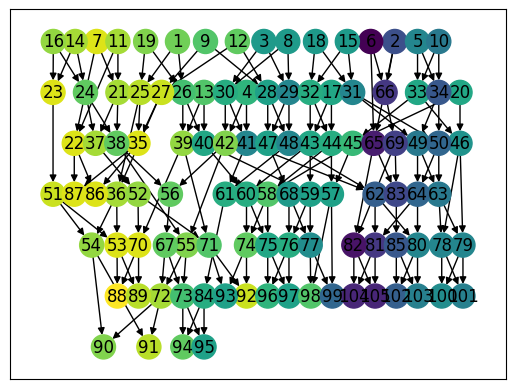

In [39]:
# Gera o gráfico com o histórico de filhos gerados
graph = networkx.DiGraph(histEA.genealogy_tree)
graph = graph.reverse()  # Make the grah top-down
colors = [toolbox.evaluate(histEA.genealogy_history[i])[0] for i in graph]
positions = graphviz_layout(graph, prog="dot")
networkx.draw_networkx_labels(graph, positions)
networkx.draw_networkx_nodes(graph, positions, node_color=colors)
networkx.draw_networkx_edges(graph, positions)
plt.savefig('figHistory_eaSimple')
plt.show()

(ii) eaMuPlusLambda



In [40]:
toolbox.register("evaluate", fitnessFunction)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb = 0.01)
toolbox.register("select", tools.selBest)

# Gera o objeto History
histMuLambda = tools.History()
toolbox.decorate("mate", histMuLambda.decorator)
toolbox.decorate("mutate", histMuLambda.decorator)

In [41]:
# Gera o Algoritmo Genético com a estrutura e operadores cadastrados

mu = 5
_lambda = 5
pop = toolbox.Populacao(n=mu)
histMuLambda.update(pop)

finalPop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu, _lambda, prob_cx, prob_mt, nger, verbose=False)

melhorSolucao = tools.selBest(finalPop, 1)
print(f'Fitness: {melhorSolucao[0].fitness.values}')

Fitness: (119.0,)


In [42]:
histMuLambda.genealogy_tree

{1: (),
 2: (),
 3: (),
 4: (),
 5: (),
 6: (5, 4),
 7: (5, 4),
 8: (4, 3),
 9: (4, 3),
 10: (5,),
 11: (2, 4),
 12: (2, 4),
 13: (6, 11),
 14: (6, 11),
 15: (11, 2),
 16: (11, 2),
 17: (6, 2),
 18: (6, 2),
 19: (6, 5),
 20: (6, 5),
 21: (6, 11),
 22: (6, 11),
 23: (6, 19),
 24: (6, 19),
 25: (5, 17),
 26: (5, 17),
 27: (17, 5),
 28: (17, 5),
 29: (10, 5),
 30: (10, 5),
 31: (10, 6),
 32: (10, 6),
 33: (10, 29),
 34: (10, 29),
 35: (25,),
 36: (25, 29),
 37: (25, 29),
 38: (17, 29),
 39: (17, 29),
 40: (5,),
 41: (40,),
 42: (5, 35),
 43: (5, 35),
 44: (17, 5),
 45: (17, 5),
 46: (35, 40),
 47: (35, 40),
 48: (25, 5),
 49: (25, 5)}

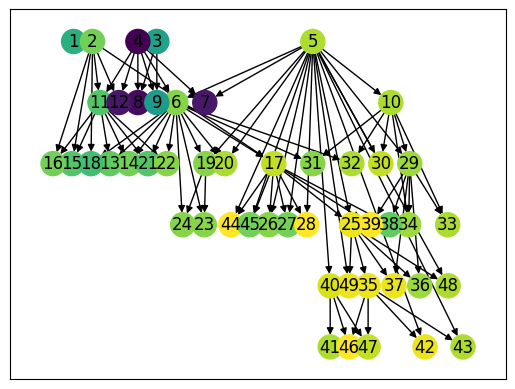

In [43]:
# Gera o gráfico com o histórico de filhos gerados
graph = networkx.DiGraph(histMuLambda.genealogy_tree)
graph = graph.reverse()  # Make the grah top-down
colors = [toolbox.evaluate(histMuLambda.genealogy_history[i])[0] for i in graph]
positions = graphviz_layout(graph, prog="dot")
networkx.draw_networkx_labels(graph, positions)
networkx.draw_networkx_nodes(graph, positions, node_color=colors)
networkx.draw_networkx_edges(graph, positions)
plt.savefig('figHistory-MuLambda')
plt.show()

(ii) eaMuCommaLambda



In [44]:
toolbox.register("evaluate", fitnessFunction)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb = 0.01)
toolbox.register("select", tools.selBest)

histMuComma = tools.History()
toolbox.decorate("mate", histMuComma.decorator)
toolbox.decorate("mutate", histMuComma.decorator)

In [45]:
# Gera o Algoritmo Genético com a estrutura e operadores cadastrados
mu = 5
_lambda = 10
pop = toolbox.Populacao(n=mu)
histMuComma.update(pop)

finalPop, log = algorithms.eaMuCommaLambda(pop, toolbox, mu, _lambda, prob_cx, prob_mt, nger, verbose=False)

melhorSolucao = tools.selBest(finalPop, 1)
print(f'Fitness: {melhorSolucao[0].fitness.values}')

Fitness: (118.0,)


In [46]:
histMuComma.genealogy_tree

{1: (),
 2: (),
 3: (),
 4: (),
 5: (),
 6: (1, 5),
 7: (1, 5),
 8: (3, 1),
 9: (3, 1),
 10: (3,),
 11: (2, 4),
 12: (2, 4),
 13: (1, 2),
 14: (1, 2),
 15: (4, 2),
 16: (4, 2),
 17: (5, 1),
 18: (5, 1),
 19: (3,),
 20: (1, 4),
 21: (1, 4),
 22: (5, 2),
 23: (5, 2),
 24: (19, 10),
 25: (19, 10),
 26: (15, 17),
 27: (15, 17),
 28: (17, 19),
 29: (17, 19),
 30: (22, 15),
 31: (22, 15),
 32: (10, 19),
 33: (10, 19),
 34: (17, 22),
 35: (17, 22),
 36: (17, 15),
 37: (17, 15),
 38: (10,),
 39: (17, 15),
 40: (17, 15),
 41: (30, 26),
 42: (30, 26),
 43: (34,),
 44: (36, 26),
 45: (36, 26),
 46: (26,),
 47: (30, 39),
 48: (30, 39),
 49: (30, 36),
 50: (30, 36),
 51: (36, 39),
 52: (36, 39),
 53: (30, 39),
 54: (30, 39),
 55: (30, 39),
 56: (30, 39),
 57: (30,),
 58: (47, 41),
 59: (47, 41),
 60: (49, 55),
 61: (49, 55),
 62: (49, 47),
 63: (49, 47),
 64: (49, 55),
 65: (49, 55),
 66: (57,),
 67: (41, 55),
 68: (41, 55),
 69: (49, 57),
 70: (49, 57),
 71: (49, 41),
 72: (49, 41),
 73: (49, 55),

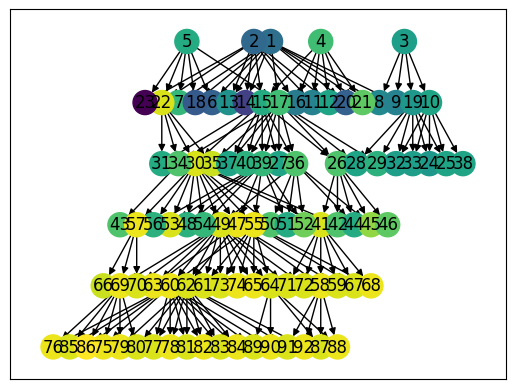

In [47]:
# Gera o gráfico com o histórico de filhos gerados
graph = networkx.DiGraph(histMuComma.genealogy_tree)
graph = graph.reverse()  # Make the grah top-down
colors = [toolbox.evaluate(histMuComma.genealogy_history[i])[0] for i in graph]
positions = graphviz_layout(graph, prog="dot")
networkx.draw_networkx_labels(graph, positions)
networkx.draw_networkx_nodes(graph, positions, node_color=colors)
networkx.draw_networkx_edges(graph, positions)
plt.savefig('figHistory-MuComma')
plt.show()